In [1]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('custom', 
                                             [(0, '#D89F39'),
                                              (0.5, '#FFFFFF'),
                                              (1, '#3A81BA')], N=126)

First, we plot the plain old linear score function and it's decision boundary for $$Score(x) > 0$$

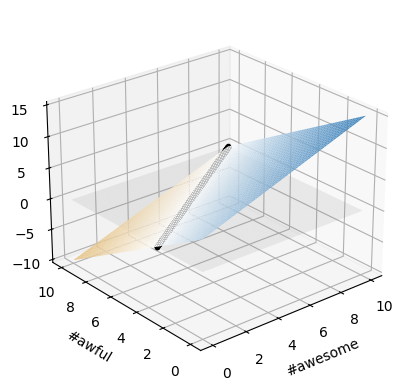

In [3]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

w = (5, 1, -1.5)

def z_function(x, y, w):
    return w[0] + w[1] * x + w[2] * y

x = np.linspace(0, 10, 500)
y = np.linspace(0, 10, 500)

X, Y = np.meshgrid(x, y)
Z = z_function(X, Y, w)

fig = plt.figure()
ax = plt.axes(projection="3d")

ax.plot_surface(X, Y, Z, cmap=cmap, vmin=-15, vmax=15)
ax.set_xlabel('#awesome')
ax.set_ylabel('#awful')
ax.set_zlabel('score')
ax.view_init(25, 230)


# Draw decision boundary
ys = (-w[0] - w[1] * x) / w[2]
ax.plot(x, ys, 0, '.', c='black')
ax.plot_surface(X, Y, np.zeros(Z.shape), color='gray', alpha=0.1)

plt.show()

We then show the sigmoid function for different values of $Score(x)$

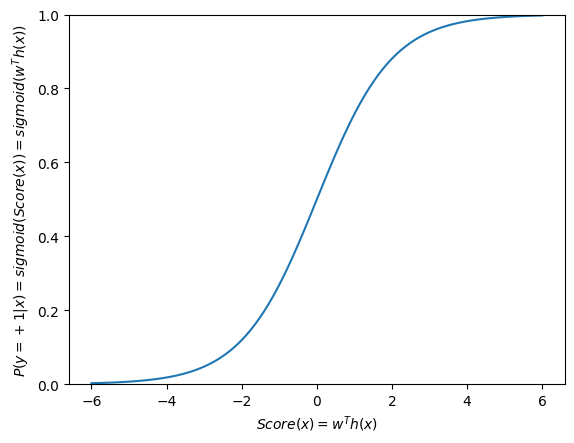

In [4]:
def probability(w, x):
    return 1 / (1 + np.exp(-w * x))

x = np.linspace(-6, 6, 100)
w = 1
z = probability(w, x)

fig, ax = plt.subplots(1)

ax.plot(x, z)
ax.set_xlabel('$Score(x) = w^Th(x)$')
ax.set_ylabel('$P(y=+1|x) = sigmoid(Score(x)) = sigmoid(w^Th(x))$')
ax.set_ylim(0, 1)

plt.show()

We then show what the sigmoid function applied to the $Score(x)$ looks like in 3-d

In [5]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def z_function(x, y):
    return 1 / (1 + np.exp(-(1 * x - 1.5 * y)))

x = np.linspace(0, 10, 500)
y = np.linspace(0, 10, 500)

X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)

fig = plt.figure()
ax = plt.axes(projection="3d")

ax.plot_surface(X, Y, Z, cmap=cmap, vmin=0, vmax=1) 
ax.set_xlabel('#awesome')
ax.set_ylabel('#awful')
ax.set_zlabel('score')
ax.set_zlim(0, 1)
ax.view_init(25, 230)

draw_boundary = True
if draw_boundary:
    ys = 1/1.5 * x
    
    # Draw shaded region for positive label
    pos = Poly3DCollection([[(0, 0, 0), (10, 0, 0), (10, 10/1.5, 0), (0,0,0)]])
    pos.set_alpha(0.4)
    pos.set_facecolor('#3A81BA')
    ax.add_collection(pos)
    
    # Draw shaded region for negative label
    neg = Poly3DCollection([[(0, 0, 0), (10, 10/1.5, 0), (10, 10, 0,), (0, 10, 0), (0,0,0)]])
    neg.set_alpha(0.4)
    neg.set_facecolor('#D89F39')
    ax.add_collection(neg)
    
    # Draw decision boundary
    ax.plot(x, ys, 0, c='black')

plt.show()